In [1]:
import numpy as np
import os
import glob
import cv2
import math
import pickle
import datetime
import pandas as pd
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

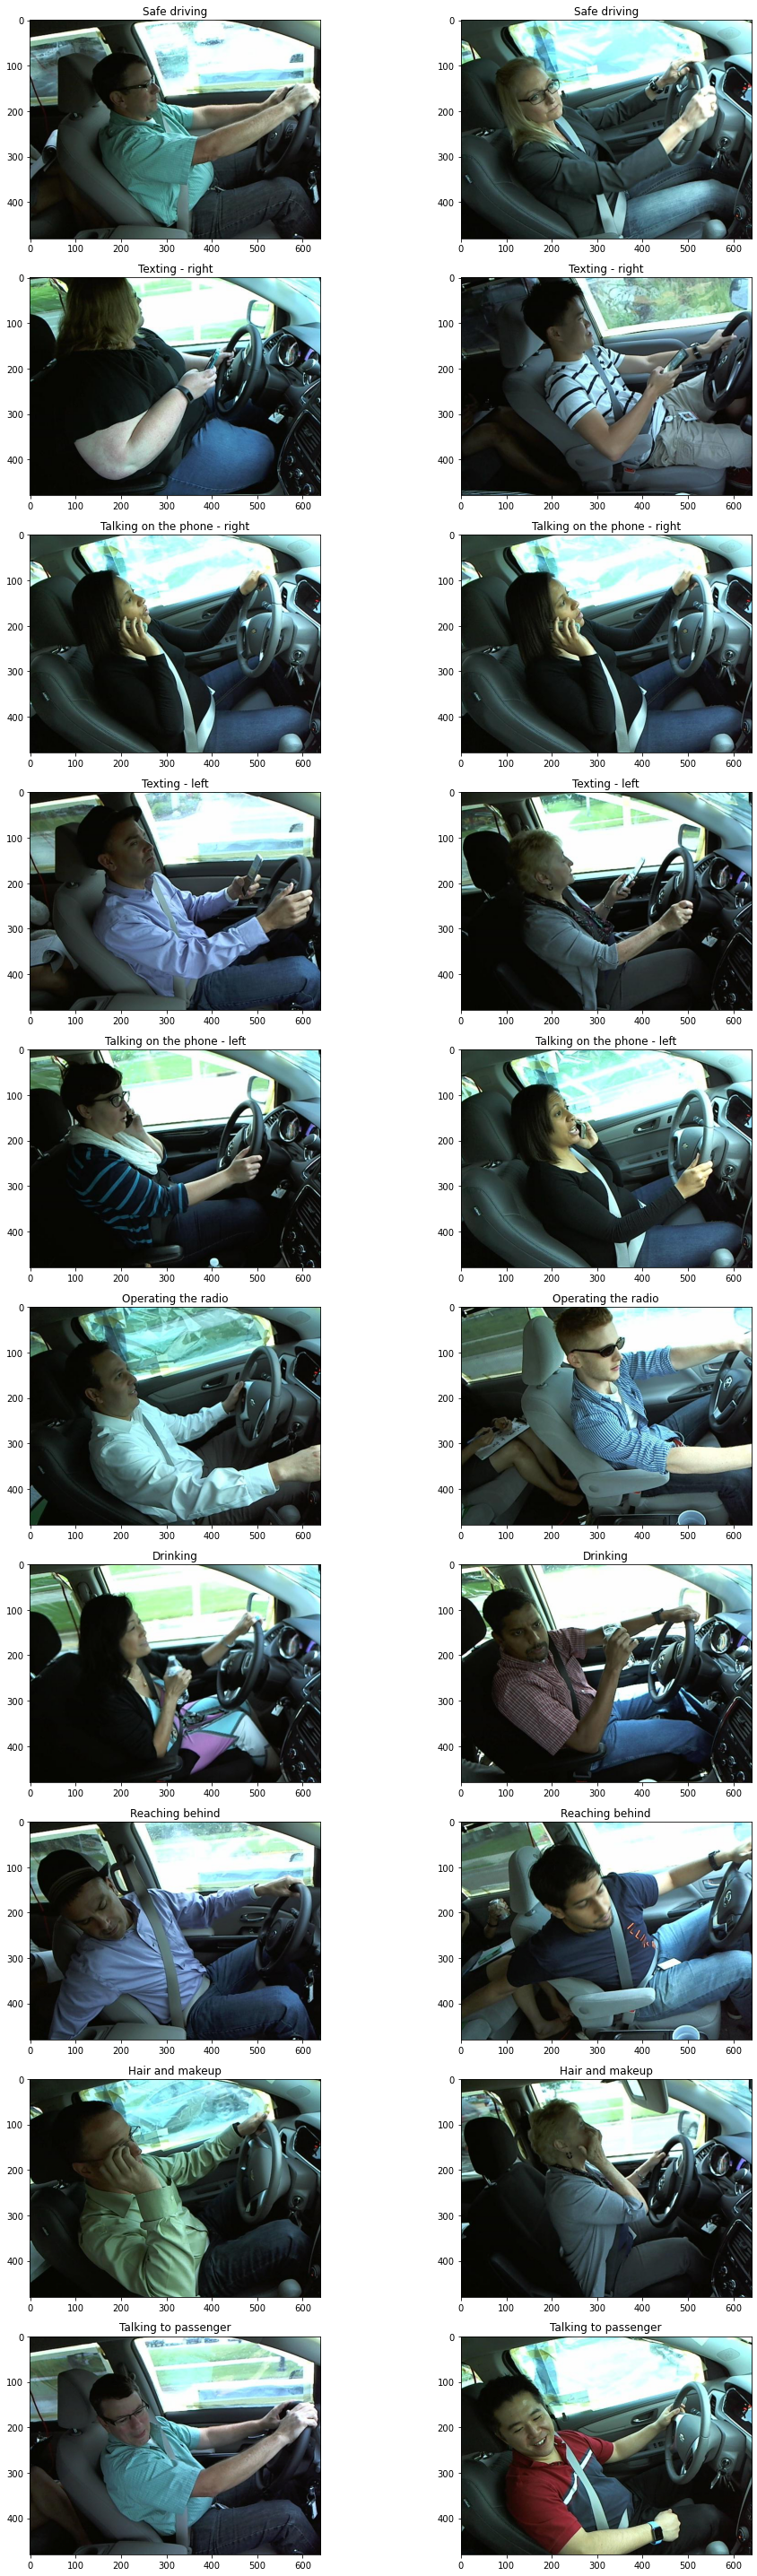

In [3]:


# Set up paths to data directories
train_dir = r'imgs\train'#{please update the relative path if necessary}

# Define activity map
activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

# Get a list of subdirectories in the train directory
subdirs = [subdir for subdir in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, subdir))]

# Display two random images from each class
fig, axes = plt.subplots(len(subdirs), 2, figsize=(15, 40))
for i, subdir in enumerate(subdirs):
    # Get a list of image files in the current subdirectory
    img_files = [f for f in os.listdir(os.path.join(train_dir, subdir)) if f.endswith('.jpg')]
    # Choose two random image files from the list
    img_paths = [os.path.join(train_dir, subdir, random.choice(img_files)) for _ in range(2)]
    for j, img_path in enumerate(img_paths):
        img = Image.open(img_path) # Load image
        axes[i, j].imshow(img)
        axes[i, j].set_title(activity_map[subdir])
plt.tight_layout()
plt.show()


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_gen = ImageDataGenerator(width_shift_range = 0.3,
                               height_shift_range = 0.3,
                               shear_range = 0.3,
                               zoom_range = 0.4,
                               validation_split = 0.2)

test_gen = ImageDataGenerator()

In [4]:
IMG_SIZE = (64 ,64)
BATCH_SIZE = 40

In [5]:
train_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         subset='training',
                                         seed = 42)

Found 17943 images belonging to 10 classes.


In [6]:
val_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         subset='validation',
                                         seed = 42)

Found 4481 images belonging to 10 classes.


In [21]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def create_model(img_rows, img_cols, color_type=3, num_classes=10):
    # Define the input layer
    input_layer = Input(shape=(img_rows, img_cols, color_type))

    # CNN layers
    conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
    batch1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(batch1)
    drop1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(64, (3, 3), activation='relu')(drop1)
    batch2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(batch2)
    drop2 = Dropout(0.25)(pool2)

    conv3 = Conv2D(128, (3, 3), activation='relu')(drop2)
    batch3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(batch3)
    drop3 = Dropout(0.25)(pool3)

    # Flatten the output from CNN layers
    flatten = Flatten()(drop3)

    # Dense layers
    dense1 = Dense(512, activation='relu')(flatten)
    batch4 = BatchNormalization()(dense1)
    drop4 = Dropout(0.5)(batch4)

    dense2 = Dense(128, activation='relu')(drop4)
    batch5 = BatchNormalization()(dense2)
    drop5 = Dropout(0.5)(batch5)

    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(drop5)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    return model


In [22]:
img_rows =64
img_cols=64
model = create_model(img_rows,img_cols)
model.summary()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0   

In [ ]:
history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data,
    verbose=1
)

Epoch 1/30
449/449 [==============================] - 86s 191ms/step - loss: 1.4559 - accuracy: 0.4663 - val_loss: 1.2819 - val_accuracy: 0.5327
Epoch 2/30
449/449 [==============================] - 87s 193ms/step - loss: 1.2840 - accuracy: 0.5416 - val_loss: 1.1554 - val_accuracy: 0.5854
Epoch 3/30
449/449 [==============================] - 87s 195ms/step - loss: 1.1190 - accuracy: 0.6079 - val_loss: 1.0134 - val_accuracy: 0.6449
Epoch 4/30
449/449 [==============================] - 87s 193ms/step - loss: 1.0270 - accuracy: 0.6433 - val_loss: 0.9272 - val_accuracy: 0.6784
Epoch 5/30
449/449 [==============================] - 88s 195ms/step - loss: 0.9294 - accuracy: 0.6831 - val_loss: 0.8639 - val_accuracy: 0.7121
Epoch 6/30
449/449 [==============================] - 85s 189ms/step - loss: 0.8722 - accuracy: 0.7029 - val_loss: 0.7202 - val_accuracy: 0.7485
Epoch 7/30
449/449 [==============================] - 86s 192ms/step - loss: 0.8212 - accuracy: 0.7212 - val_loss: 0.6747 - val_ac

In [24]:
from tensorflow.keras.applications import VGG19
import tensorflow as tf
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

ck = ModelCheckpoint('best_model_vgg.hdf5', save_best_only=True, monitor='val_loss', mode='min')
es = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=[es, ck],
    verbose=1
)

Epoch 1/20
449/449 [==============================] - 483s 1s/step - loss: 3.4477 - accuracy: 0.2387 - val_loss: 2.1038 - val_accuracy: 0.2977
Epoch 2/20
449/449 [==============================] - 538s 1s/step - loss: 1.9262 - accuracy: 0.3424 - val_loss: 1.8649 - val_accuracy: 0.3544
Epoch 3/20
449/449 [==============================] - 543s 1s/step - loss: 1.7721 - accuracy: 0.3944 - val_loss: 1.7662 - val_accuracy: 0.4071
Epoch 4/20
449/449 [==============================] - 551s 1s/step - loss: 1.6924 - accuracy: 0.4240 - val_loss: 1.6559 - val_accuracy: 0.4341
Epoch 5/20
449/449 [==============================] - 757s 2s/step - loss: 1.6168 - accuracy: 0.4481 - val_loss: 1.5687 - val_accuracy: 0.4584
Epoch 6/20
449/449 [==============================] - 663s 1s/step - loss: 1.5770 - accuracy: 0.4696 - val_loss: 1.5658 - val_accuracy: 0.4787
Epoch 7/20
449/449 [==============================] - 726s 2s/step - loss: 1.5271 - accuracy: 0.4920 - val_loss: 1.5741 - val_accuracy: 0.4724

In [ ]:
base_model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    verbose=1
)

Epoch 1/20


2023-06-11 03:22:51.186887: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


449/449 [==============================] - 492s 1s/step - loss: 1.2054 - accuracy: 0.5788 - val_loss: 0.8300 - val_accuracy: 0.7128
Epoch 2/20
449/449 [==============================] - 384s 856ms/step - loss: 0.7651 - accuracy: 0.7390 - val_loss: 0.5409 - val_accuracy: 0.8157
Epoch 3/20
449/449 [==============================] - 389s 867ms/step - loss: 0.6213 - accuracy: 0.7886 - val_loss: 0.4374 - val_accuracy: 0.8567
Epoch 4/20
449/449 [==============================] - 393s 876ms/step - loss: 0.5380 - accuracy: 0.8202 - val_loss: 0.4339 - val_accuracy: 0.8561
Epoch 5/20
449/449 [==============================] - 384s 855ms/step - loss: 0.4830 - accuracy: 0.8390 - val_loss: 0.3813 - val_accuracy: 0.8721
Epoch 6/20
449/449 [==============================] - 390s 870ms/step - loss: 0.4346 - accuracy: 0.8541 - val_loss: 0.3425 - val_accuracy: 0.8882
Epoch 7/20
449/449 [==============================] - 390s 868ms/step - loss: 0.4125 - accuracy: 0.8627 - val_loss: 0.2933 - val_accuracy: